## Content
This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

## References
United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

## Inspiration
Suicide Prevention.
  
  
  
**Reference**: https://maoli.blog.csdn.net/article/details/91451605

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# 预处理：去掉没有用的两列

data = pd.read_csv('../data/Suicide_Rates_Overview.csv')
data = data.drop(['country-year','HDI for year'],axis=1)
print(data.shape)
data.head()

(27820, 10)


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [4]:
data[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


### 自杀总人数 & 自杀率分析

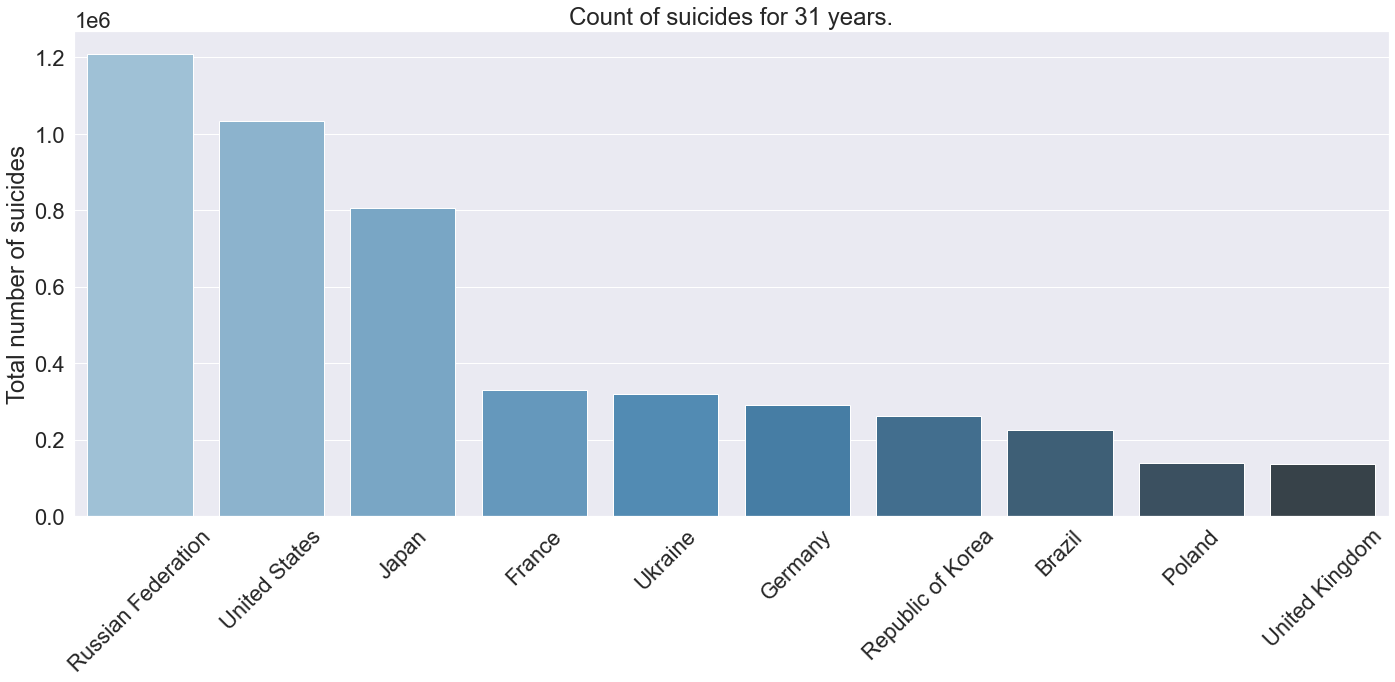

In [21]:
# 汇总31年内的自杀总人数

# group by country
suic_sum = pd.DataFrame(data['suicides_no'].groupby(data['country']).sum())
suic_sum = suic_sum.reset_index().sort_values(by='suicides_no',ascending=False)
most_cont = suic_sum.head(10)
fig = plt.figure(figsize=(20,10))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='country',data=most_cont,palette="Blues_d")
plt.xticks(rotation=45)
plt.ylabel('Total number of suicides');
plt.xlabel('')
plt.tight_layout()
plt.savefig("Count_for_31_years.png")

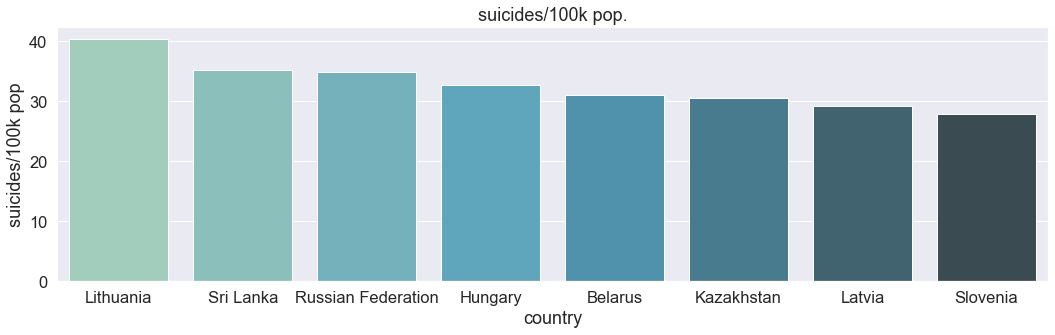

In [19]:
# 31年内的平均自杀率（每10万人自杀人数）

suic_mean = pd.DataFrame(data['suicides/100k pop'].groupby(data['country']).mean())
suic_mean = suic_mean.reset_index()
suic_mean_most = suic_mean.sort_values(by='suicides/100k pop',ascending=False).head(8)

fig = plt.figure(figsize=(15,5))
plt.title('suicides/100k pop.')
#sns.set(font_scale=1.5)
sns.barplot(y='suicides/100k pop',x='country',data=suic_mean_most,palette="GnBu_d");
plt.ylabel('suicides/100k pop')
plt.tight_layout()
plt.savefig("Suicide_rate.png")

### 自杀总人数 + GDP分析

In [6]:
from mpl_toolkits.basemap import Basemap
concap = pd.read_csv('../data/concap.csv')
concap.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [7]:
def reg(x):
    if x=='Russia':
        res = 'Russian Federation'
    else:
        res=x
    return res


concap['CountryName'] = concap['CountryName'].apply(reg)

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         suic_sum,left_on='CountryName',right_on='country')

In [14]:
def mapWorld(col1,size2,title3,label4,metr=100,colmap='hot',figname='None'):
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=70,\
            llcrnrlon=-110,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    lat = data_full['CapitalLatitude'].values
    lon = data_full['CapitalLongitude'].values
    a_1 = data_full[col1].values
    if size2:
        a_2 = data_full[size2].values
    else: a_2 = 1
    m.scatter(lon, lat, latlon=True,c=a_1,s=metr*a_2,linewidth=1,edgecolors='black',cmap=colmap, alpha=1)
    
    cbar = m.colorbar()
    cbar.set_label(label4,fontsize=30)
    plt.title(title3, fontsize=30)
    plt.savefig(figname)
    plt.show()

E:\Anaconda\envs\Bling\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\envs\Bling\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


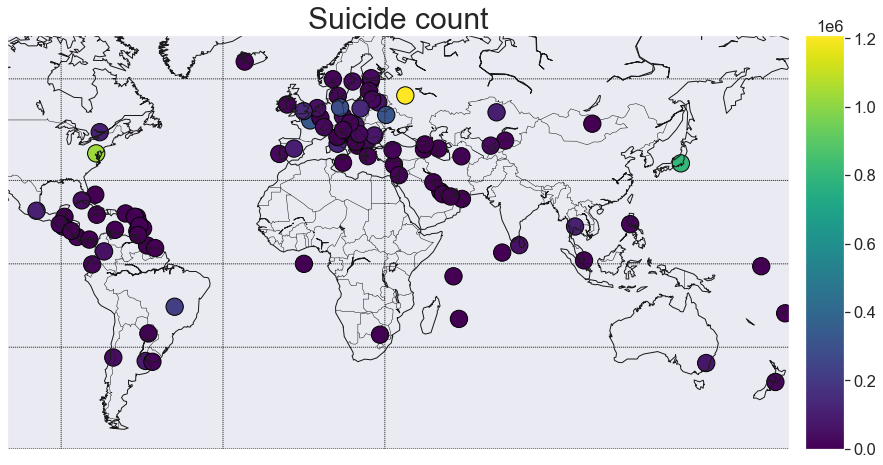

In [15]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,15))
mapWorld(col1='suicides_no', size2=False,title3='Suicide count',label4='',metr=300,colmap='viridis', figname = 'Suicide_count_map.png')


E:\Anaconda\envs\Bling\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\envs\Bling\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


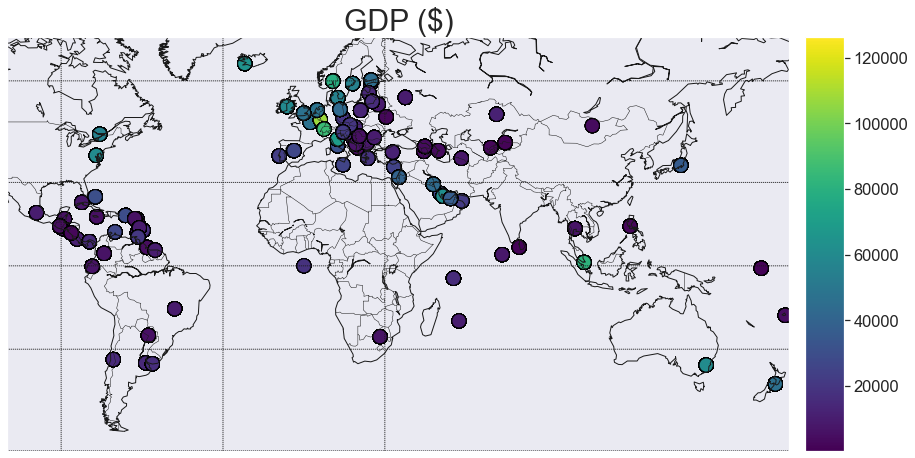

In [17]:
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         data,left_on='CountryName',right_on='country')
plt.figure(figsize=(15,15))
mapWorld(col1='gdp_per_capita ($)', size2=False,title3='GDP ($)',label4='',metr=200,colmap='viridis', figname = 'GDP_map.png')

### 自杀总人数 + 性别分析

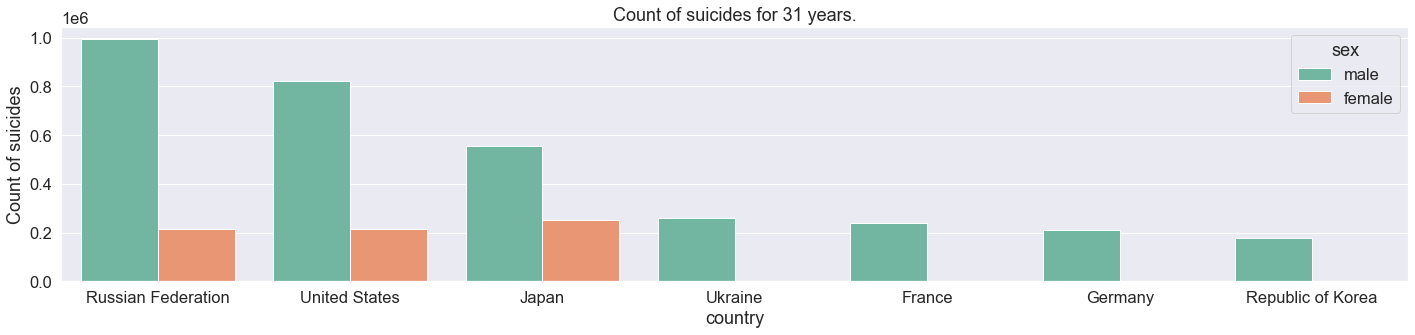

In [18]:
# 考虑性别差异:

suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no',ascending=False)
most_cont_m = suic_sum_m.head(10)
most_cont_m.head(10)
fig = plt.figure(figsize=(20,5))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=1.5)
sns.barplot(y='suicides_no',x='country',hue='sex',data=most_cont_m,palette='Set2');
plt.ylabel('Count of suicides')
plt.tight_layout()
plt.savefig("Count_for_31_years_by_Gender.png")

### 2000之后的自杀率分析

E:\Anaconda\envs\Bling\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\envs\Bling\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


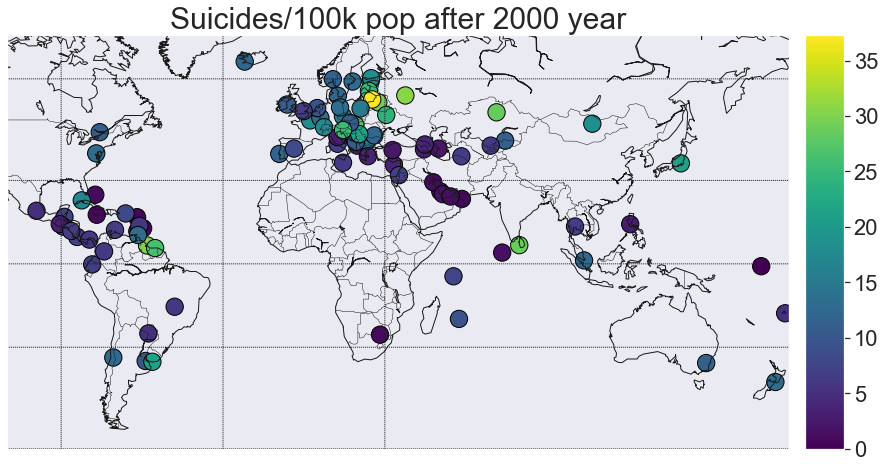

In [22]:
data_last = data[data['year'] > 2000]
suic_mean = pd.DataFrame(data_last['suicides/100k pop'].groupby(data_last['country']).mean())
suic_mean = suic_mean.reset_index()
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         suic_mean,left_on='CountryName',right_on='country')
plt.figure(figsize=(15,15))
mapWorld(col1='suicides/100k pop', size2=False,title3='Suicides/100k pop after 2000 year',label4='',metr=300,colmap='viridis', figname = 'Suicide_rate_map.png')

In [23]:
data_last

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
144,Albania,2001,male,25-34 years,22,206484,10.65,"4,060,758,804",1451,Generation X
145,Albania,2001,male,35-54 years,34,378826,8.98,"4,060,758,804",1451,Boomers
146,Albania,2001,male,55-74 years,11,196670,5.59,"4,060,758,804",1451,Silent
147,Albania,2001,female,75+ years,2,47254,4.23,"4,060,758,804",1451,Silent
148,Albania,2001,male,15-24 years,10,256039,3.91,"4,060,758,804",1451,Millenials
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


### 按年份分布的自杀率 & 总人数：

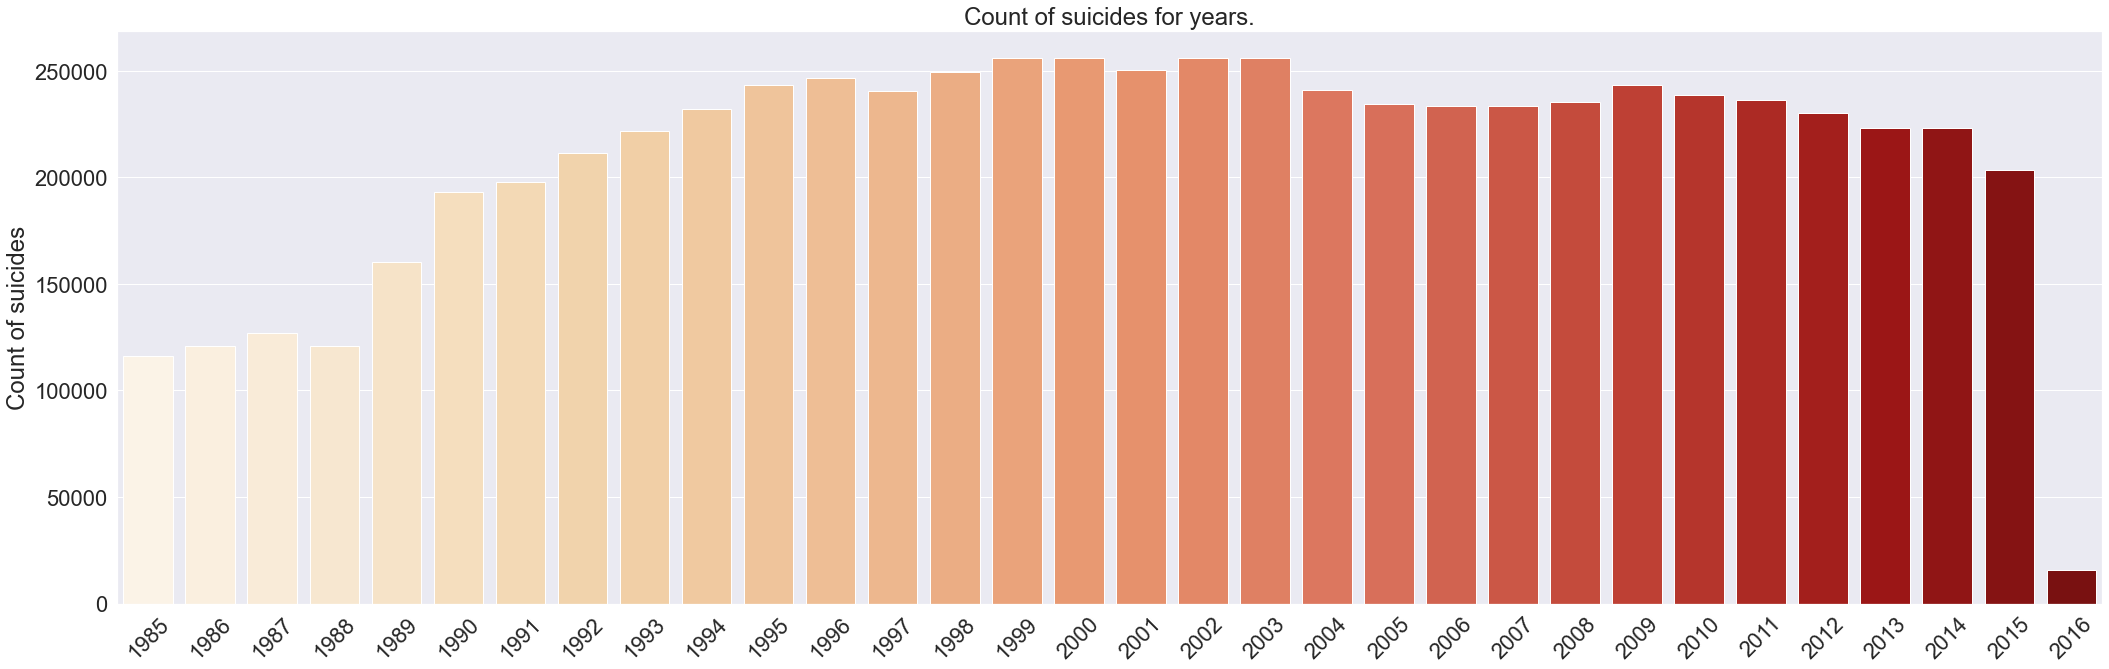

In [31]:
# 自杀总人数

suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby(data['year']).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_values(by='suicides_no',ascending=False)
most_cont_yr = suic_sum_yr
fig = plt.figure(figsize=(30,10))
plt.title('Count of suicides for years.')
sns.set(font_scale=2.5)
sns.barplot(y='suicides_no',x='year',data=most_cont_yr,palette="OrRd");
plt.ylabel('Count of suicides')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Count_of_Suicides_for_years.png')

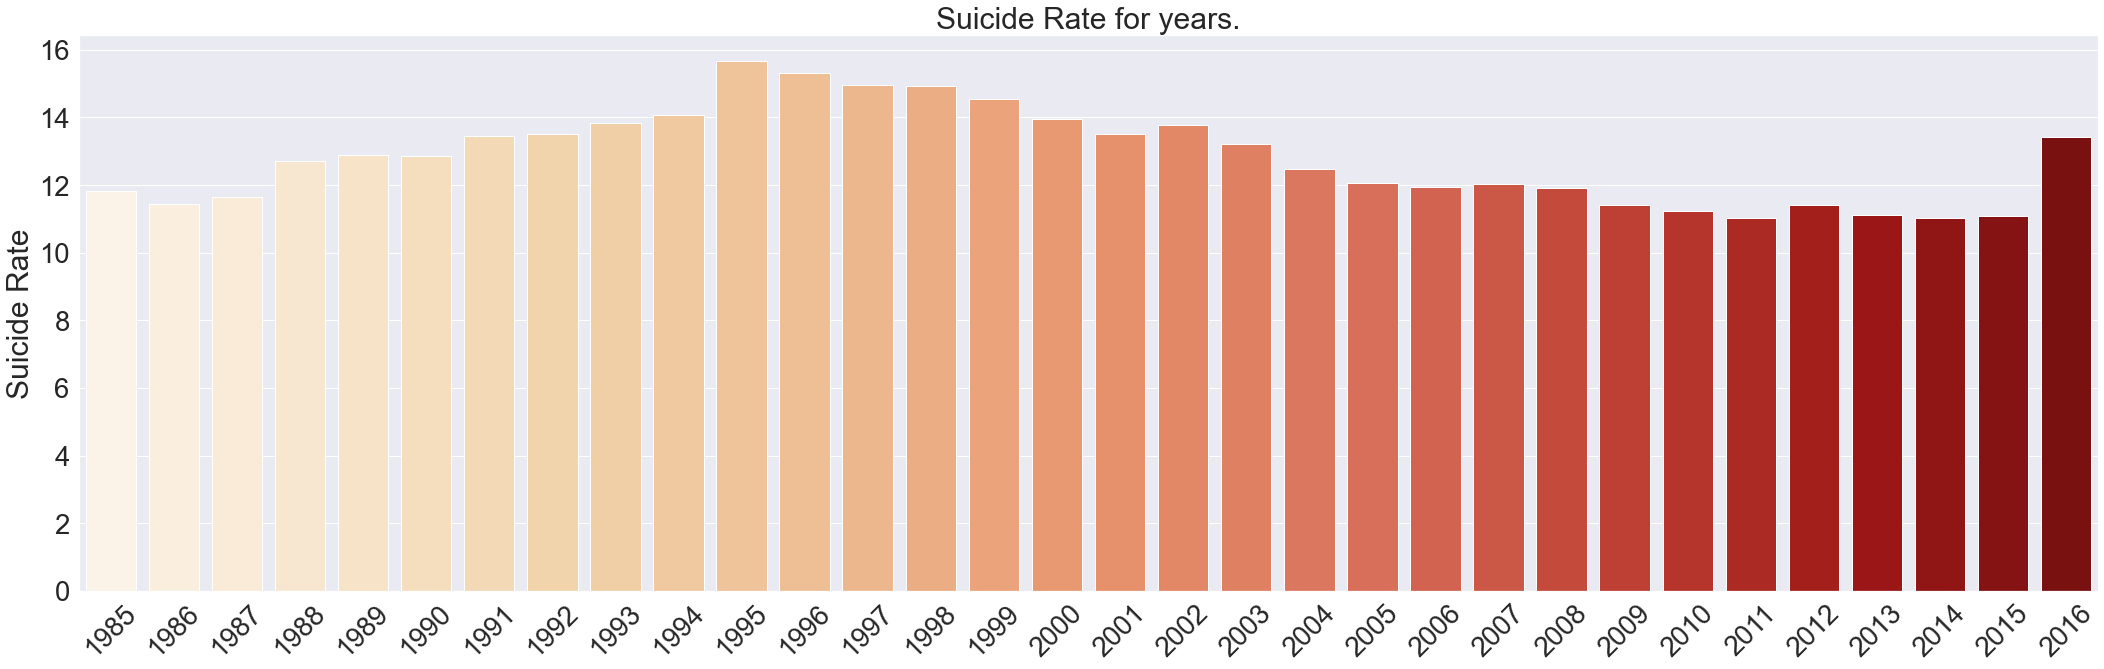

In [33]:
# 自杀率

suic_sum_yr = pd.DataFrame(data['suicides/100k pop'].groupby(data['year']).mean())
suic_sum_yr = suic_sum_yr.reset_index().sort_values(by='suicides/100k pop',ascending=False)
most_cont_yr = suic_sum_yr
fig = plt.figure(figsize=(30,10))
plt.title('Suicide Rate for years.')
sns.set(font_scale=2.5)
sns.barplot(y='suicides/100k pop',x='year',data=most_cont_yr,palette="OrRd");
plt.ylabel('Suicide Rate')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Suicide_Rate_for_years.png')

### 按年龄分布的自杀人数

In [34]:
suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby([data['generation'],data['year']]).sum())

In [35]:
suic_sum_yr

suicides_no
generation year             
Boomers    1985        20771
           1986        21685
           1987        22309
           1988        21332
           1989        29427
...                      ...
Silent     2012        24578
           2013        24153
           2014        24865
           2015        23114
           2016         1857

[146 rows x 1 columns]

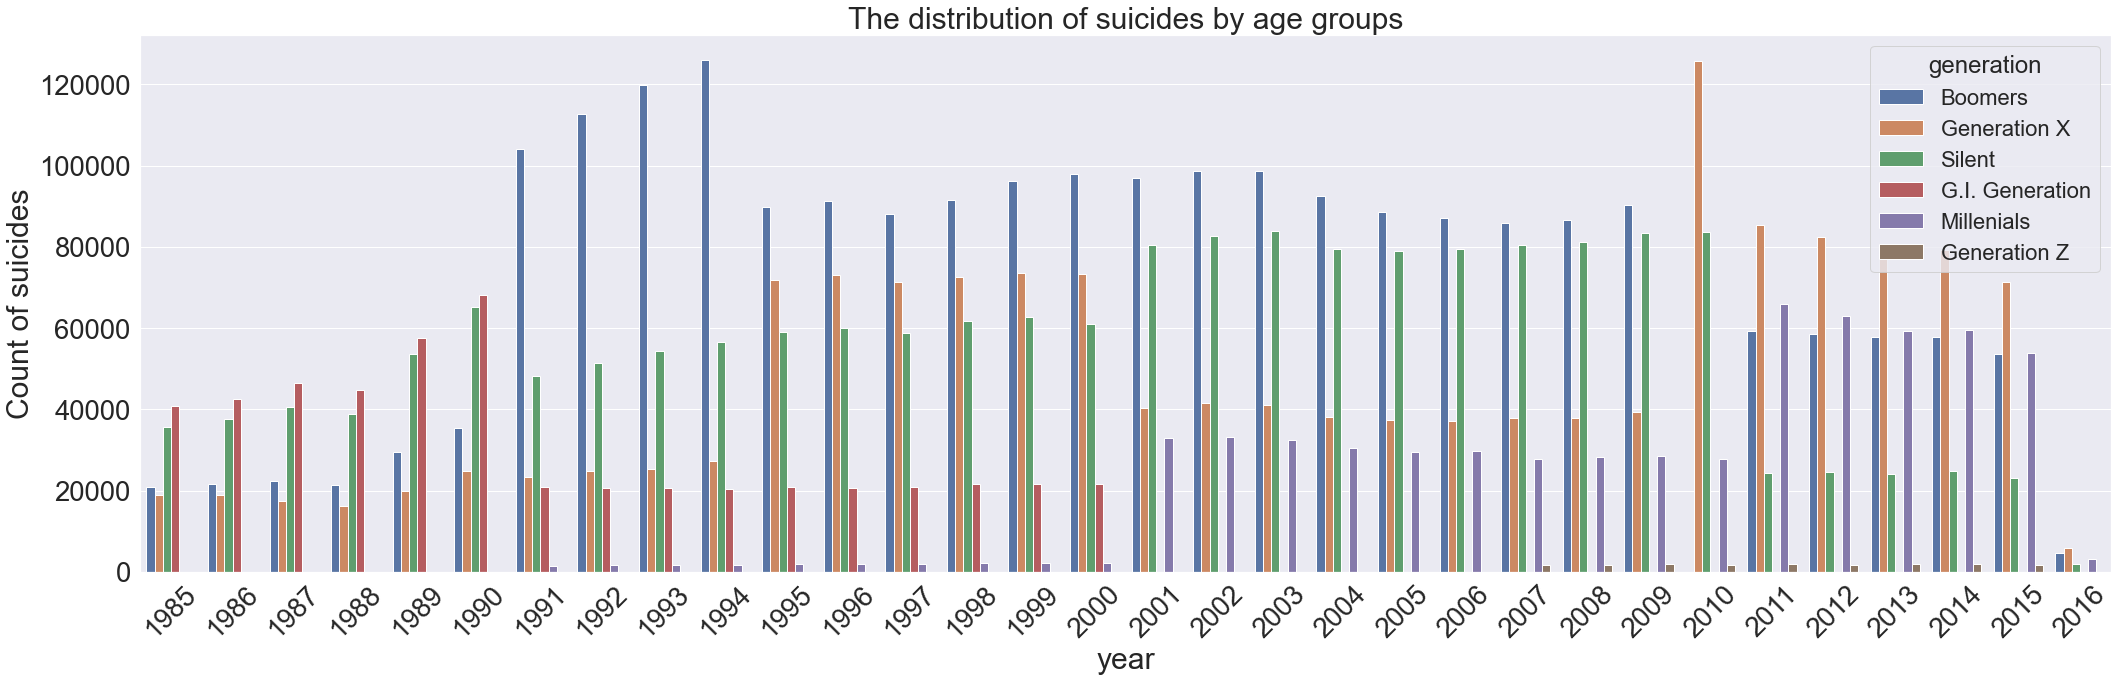

In [36]:
suic_sum_yr = suic_sum_yr.reset_index().sort_values(by='suicides_no',ascending=False)
most_cont_yr = suic_sum_yr
fig = plt.figure(figsize=(30,10))
plt.title('The distribution of suicides by age groups')

sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='year',hue='generation',data=most_cont_yr,palette='deep');
plt.ylabel('Count of suicides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Distribution_of_suicides_by_age.png')

 Generation X:100 
 Silent:200 
 G.I. Generation:300 
 Boomers:400 
 Millenials:500 
 Generation Z:600


E:\Anaconda\envs\Bling\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\envs\Bling\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


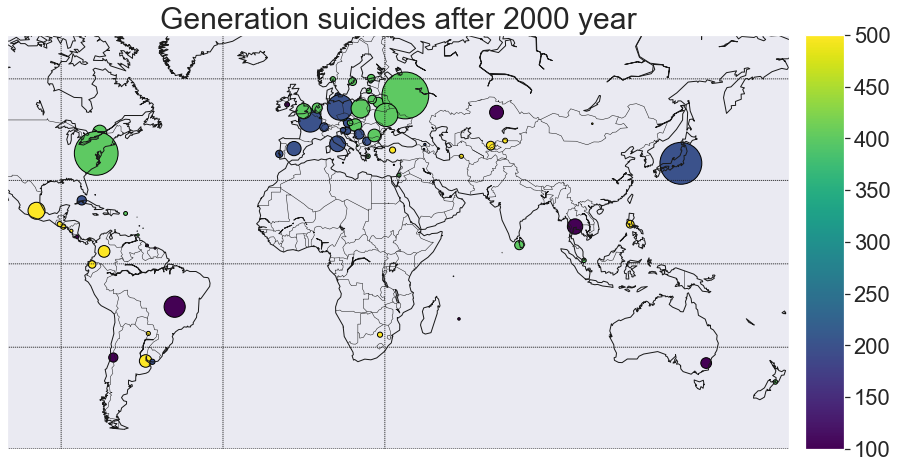

In [37]:
data_new = data[data['year']>=2000]
title_map = 'Generation suicides after 2000 year'
data_gener = pd.DataFrame(data_new['suicides_no'].groupby([data_new['generation'],data_new['country']]).sum()).reset_index()
age_max = pd.DataFrame(data_gener['suicides_no'].groupby(data_gener['country']).max()).reset_index()
gen_full = pd.merge(age_max,data_gener,left_on=['suicides_no','country'],right_on=['suicides_no','country'])

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         gen_full,left_on='CountryName',right_on='country')
data_full.dropna(inplace=True)

def gener(x):
    dic_t = {'Generation X':100,'Silent':200,'G.I. Generation':300,'Boomers':400,'Millenials':500,'Generation Z':600}
    return dic_t[x]
data_full.generation = data_full.generation.apply(gener)
print(" Generation X:100 \n Silent:200 \n G.I. Generation:300 \n Boomers:400 \n Millenials:500 \n Generation Z:600")
plt.figure(figsize=(15,15))
mapWorld(col1='generation', size2='suicides_no', title3=title_map,label4='',metr=0.01,colmap='viridis',figname='Generation_suicides.png')